In [1]:
import numpy as np
from ase import Atoms
from ase.units import Bohr
from gpaw.jellium import Jellium
from gpaw import GPAW, PW

rs = 5.0 * Bohr  # Wigner-Seitz radius
h = 0.2          # grid-spacing
a = 50 * h        # lattice constant
k = 1           # number of k-points (k*k*k)

ne = 14 # a**3 / (4 * np.pi / 3 * rs**3)
jellium = Jellium(ne)

bulk = Atoms(pbc=True, cell=(a, a, a))
bulk.calc = GPAW(mode=PW(200.0),
                 background_charge=jellium,
                 xc='LDA_X+LDA_C_WIGNER',
                 nbands=7,
                 kpts=[k, k, k],
                 h=h,
                 txt='bulk.txt')
e0 = bulk.get_potential_energy()

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.


KohnShamConvergenceError: Did not converge!  See text output for help.

In [3]:
import matplotlib.pyplot as plt
def plot_dens(calc, dens, label=None):
    axis = 2
    gridrefinement = 1  # needs to be 1!
    gridpos = calc.density.gd.get_grid_point_coordinates()
    xs = []
    ys = []
    gridz = sorted(set(gridpos[axis].reshape(-1)))
    for idx in range(len(gridz)):
        xs.append(gridz[idx])
        ys.append(np.sum(dens[np.where(gridpos[axis] == gridz[idx])]))
    plt.plot(xs, ys, label=label)

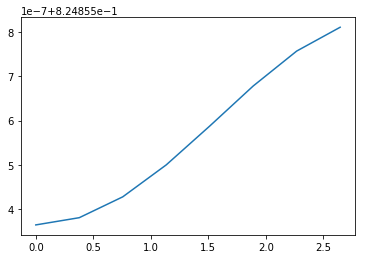

In [4]:
plot_dens(bulk.calc, bulk.calc.get_all_electron_density())